In [1]:
print(context)

In [2]:
%reload_kedro

2019-09-29 00:49:44,513 - root - INFO - ** Kedro project sneakairs
2019-09-29 00:49:44,515 - root - INFO - Defined global variable context


In [3]:
import pandas as pd
pd.set_option('display.max_columns', 100)
from kedro.io import *
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [4]:
df = context.io.load('kof_processed')

2019-09-29 00:49:45,175 - kedro.io.data_catalog - INFO - Loading data from `kof_processed` (CSVLocalDataSet)...


In [5]:
df['Date'] = pd.to_datetime(df.Date)

In [6]:
df['year'] = df['Date'].apply(lambda x: x.year)
df['month'] = df['Date'].apply(lambda x: x.month)
df['week'] = df['Date'].apply(lambda x: x.week)
df['day'] = df['Date'].apply(lambda x: x.day)

In [7]:
def day_id(x):
    if x == 'Sunday':
        return 0
    if x == 'Monday':
        return 1
    if x == 'Tuesday':
        return 2
    if x == 'Wednesday':
        return 3
    if x == 'Thursday':
        return 4
    if x == 'Friday':
        return 5
    if x == 'Saturday':
        return 6

In [8]:
df['month_name'] = df['Date'].apply(lambda x: x.month_name())
df['day_name'] = df['Date'].apply(lambda x: x.day_name())
df['day_id'] = df['day_name'].apply(lambda x: day_id(x))

In [9]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,Code_Style,Name,Brand,Date,Retail_Price,Colorway,Story,KOF_Wants,Avg_Resale,Net_Profit,Purchase,Brand_Code,Color_Code,Womens,bCollab,OG,SP,QS,SB,LS,NRG,PRM,NSW,RETRO,SE,PE,GS,HS,year,month,week,day,month_name,day_name,day_id
0,0,0,314996-101,Nike Air Foamposite One Snakeskin,Nike,2019-04-15,220,Sail/Black-Habanero Red-Black,"Equipped with an eye-catching upper, this Air ...",2281,305,49.545275,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,4,16,15,April,Monday,1


In [10]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Code_Style', 'Name', 'Brand', 'Date',
       'Retail_Price', 'Colorway', 'Story', 'KOF_Wants', 'Avg_Resale',
       'Net_Profit', 'Purchase', 'Brand_Code', 'Color_Code', 'Womens',
       'bCollab', 'OG', 'SP', 'QS', 'SB', 'LS', 'NRG', 'PRM', 'NSW', 'RETRO',
       'SE', 'PE', 'GS', 'HS', 'year', 'month', 'week', 'day', 'month_name',
       'day_name', 'day_id'],
      dtype='object')

In [11]:
df.dtypes

Unnamed: 0               int64
Unnamed: 0.1             int64
Code_Style              object
Name                    object
Brand                   object
Date            datetime64[ns]
Retail_Price             int64
Colorway                object
Story                   object
KOF_Wants                int64
Avg_Resale               int64
Net_Profit             float64
Purchase                 int64
Brand_Code               int64
Color_Code               int64
Womens                   int64
bCollab                  int64
OG                       int64
SP                       int64
QS                       int64
SB                       int64
LS                       int64
NRG                      int64
PRM                      int64
NSW                      int64
RETRO                    int64
SE                       int64
PE                       int64
GS                       int64
HS                       int64
year                     int64
month                    int64
week    

In [12]:
df.size

234506

### Average retail & resell price by brand

In [13]:
avg_retail = df.groupby(['Brand'])['Retail_Price'].mean().reset_index()

In [14]:
avg_resale = df.groupby(['Brand'])['Avg_Resale'].mean().reset_index()

In [15]:
pd.merge(avg_retail, avg_resale, on = 'Brand')

,Brand,Retail_Price,Avg_Resale
0,Adidas,140.965200,148.604728
1,Air Jordan,167.675132,200.757672
2,Asics,160.000000,158.724138
3,Converse,101.034483,124.344828
4,Jordan Brand,136.328358,112.820896
5,New Balance,168.636364,164.545455
6,Nike,144.365976,143.253610
7,Nike Basketball,179.416058,183.656934
8,Nike Running,132.656250,138.562500
9,Other Brands,136.309524,137.857143


### Distribution of brands

In [16]:
df.groupby(['Brand'])['Code_Style'].count().sort_values(ascending =False).reset_index().rename(columns={'Code_Style':'count'})


,Brand,count
0,Nike,3186
1,Adidas,1523
2,Air Jordan,945
3,Nike Basketball,137
4,Jordan Brand,134
5,Other Brands,126
6,Reebok,105
7,Puma,66
8,Nike Running,32
9,Converse,29


### Pairplot

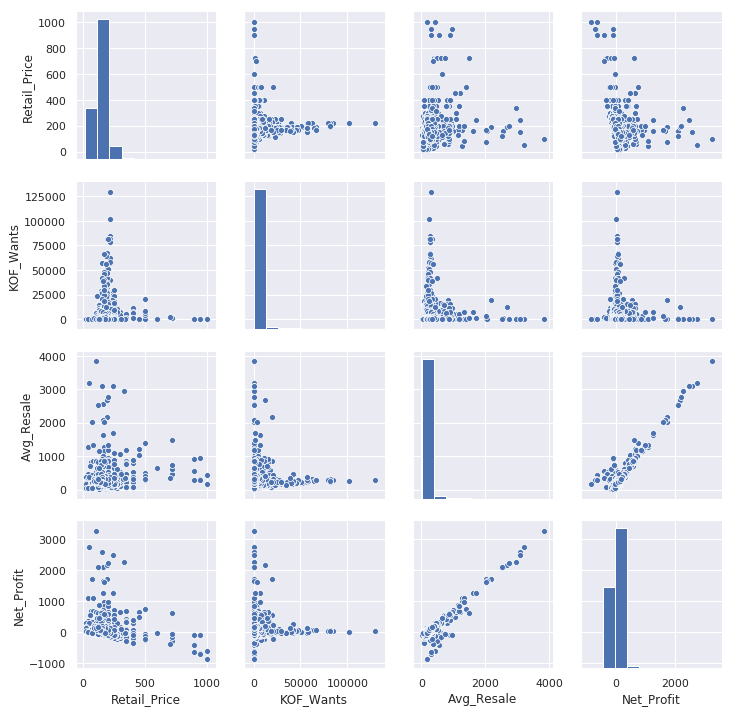

In [17]:
sns.pairplot(df, vars = ['Retail_Price','KOF_Wants','Avg_Resale','Net_Profit'])

### Portion of shoes by brand that is profitable on resale

In [18]:
split = df.groupby(['Brand', 'Purchase'])['Name'].count().sort_values(ascending=False).reset_index().rename(columns={'Name':'Count'})

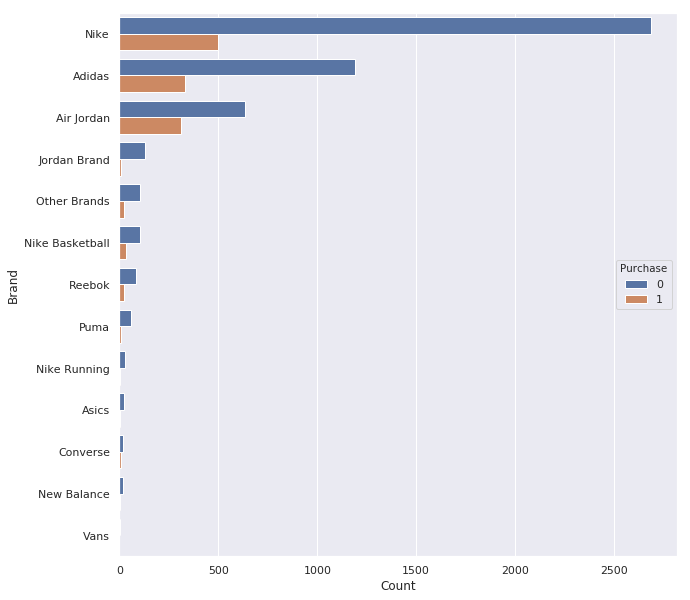

In [19]:
plt.figure(figsize=(10,10))
sns.barplot(data=split, x= 'Count', y='Brand', hue='Purchase')
plt.show()

### Heatmap of number of releases by day

In [20]:
nike = df[df['Brand']=='Nike']
nike = nike.sort_values(by=['month'])
nike = nike.groupby(['month_name','month','day_name','day_id'])['Name'].count().reset_index().rename(columns={'Name':'number_of_releases'}).sort_values(by=['month','day_id'], axis=0)


In [21]:
heatmap = nike.pivot('month', 'day_id', 'number_of_releases')

2019-09-29 00:49:49,397 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.


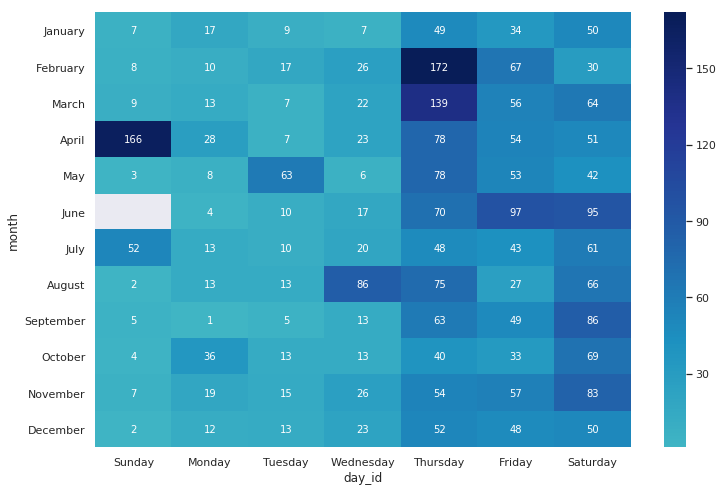

In [22]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

plt.figure(figsize=(12,8))
g = sns.heatmap(heatmap, center=0, annot=True, cmap="YlGnBu", fmt='g')
g.set_xticklabels(days)
g.set_yticklabels(months, rotation = 360)
plt.show()

### Plotting release of shoes over time by companies

In [55]:
df['month-'] = df['month'].apply(lambda x: str(x) + '-')
df['year-'] = df['year'].apply(lambda x: str(x))
df['month_year'] = df['month-'] + df['year-']

In [77]:
releases = df.groupby(['Brand','Date'])['Name'].count().reset_index().rename(columns={'Name':'count'}).sort_values(by=['Date'])


In [91]:
releases = releases[releases['Date'] >= pd.to_datetime('2013-01-01')]

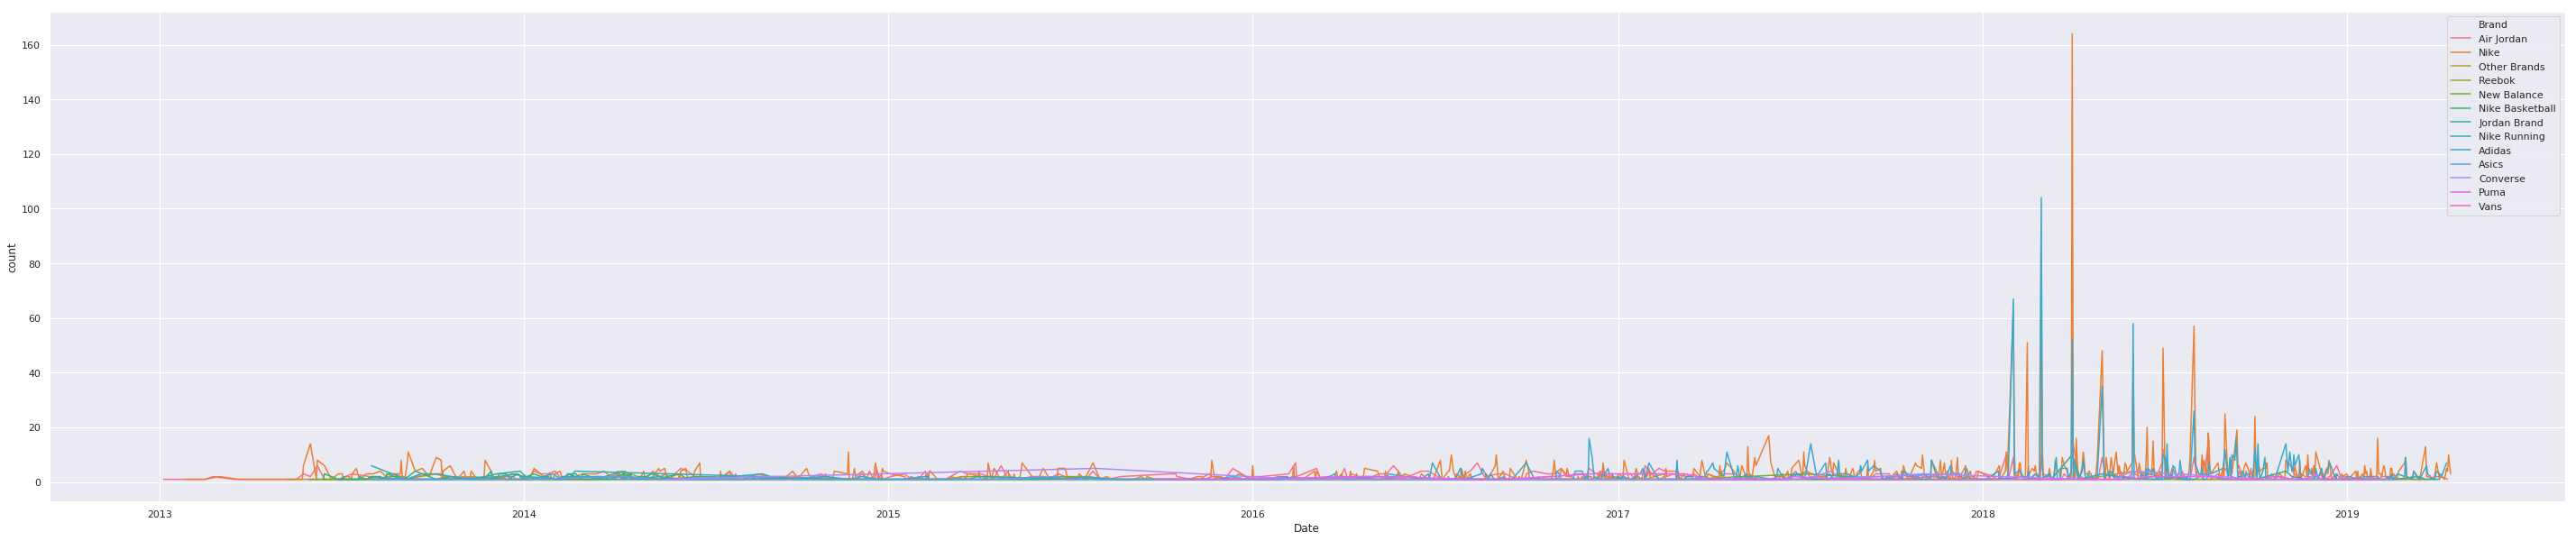

In [92]:
plt.figure(figsize=(50,10))
g = sns.lineplot(data=releases, x = 'Date', y = 'count', hue='Brand')
plt.show()